## Dummy of regression linear with sklearn and statsmodels

In [1]:
# lib manipulation dataset
import numpy as np
import pandas as pd

# lib visualization data
import matplotlib.pyplot as plt
import seaborn as sns

# lib regression linear
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

### Data Acquisition

In [2]:
# load dataset
dataset = pd.read_csv("../dataset/dummy_regresi.csv", parse_dates=["tahun"])
dataset = dataset.set_index("tahun")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2016-01-01 to 2017-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      24 non-null     float64
 1   x2      24 non-null     float64
 2   y       24 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 768.0 bytes


In [3]:
# show metadata
print(np.round(dataset.describe(),2))

          x1     x2        y
count  24.00  24.00    24.00
mean    2.07   5.78  1070.08
std     0.35   0.33   210.74
min     1.75   5.30   704.00
25%     1.75   5.50   928.25
50%     2.00   5.85  1061.00
75%     2.50   6.10  1239.00
max     2.75   6.20  1464.00


### Exploration Data Analysis

In [4]:
# Membuat korelasi pearson menggunakan lib scipy
print(pearsonr(dataset["x1"], dataset["y"]))

PearsonRResult(statistic=0.9357932222393662, pvalue=1.953974544190153e-11)


In [5]:
# Membuat korelasi pearson menggunakan lib scipy
print(pearsonr(dataset["x2"], dataset["y"]))

PearsonRResult(statistic=-0.9223375779383672, pvalue=1.4867135372874975e-10)


- Time Series Plot

In [6]:
# func lineplot for timeseries
def lineplot(x, y, label, title):
 
  # time series plot
  fig, ax = plt.subplots(figsize = (8,4))
  ax.plot(x, y, color="tab:blue", label=label, linewidth=2, marker='o')
 
  # set label-labels
  ax.set_title(title,fontsize=14)
  ax.set_xlabel("",fontsize=12)
  ax.set_ylabel("",fontsize=12)
  ax.legend(loc="best")
  ax.grid(True)
 
  # rotasi label x menjadi 45 derajat
  plt.setp(ax.xaxis.get_majorticklabels(), rotation=30)
  plt.setp(ax.xaxis.get_majorticklabels(), rotation=30)
  plt.tight_layout()
 
  # return values
  return plt.show()


In [7]:
# resample 4 monthly
df_resample = dataset.resample('4ME', closed='left').sum()
print(df_resample)

               x1    x2     y
tahun                        
2016-04-30   7.00  24.4  3121
2016-08-31   7.00  24.5  3670
2016-12-31   7.25  23.8  3913
2017-04-30   8.50  22.7  4531
2017-08-31   9.75  22.0  4939
2017-12-31  10.25  21.2  5508


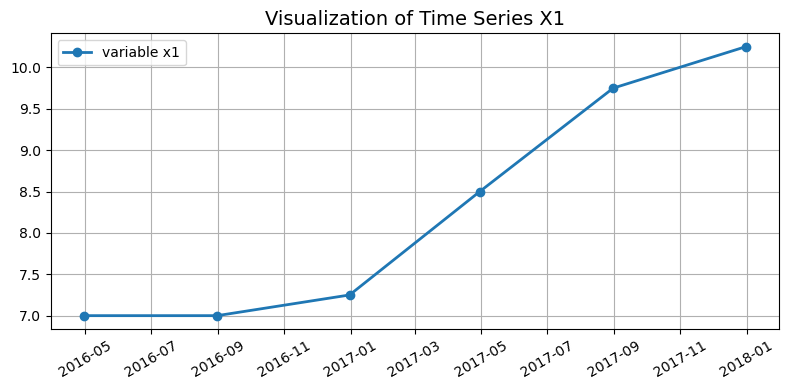

In [8]:
# visualization x1
lineplot(x=df_resample.index, y=df_resample["x1"], label="variable x1", title="Visualization of Time Series X1")

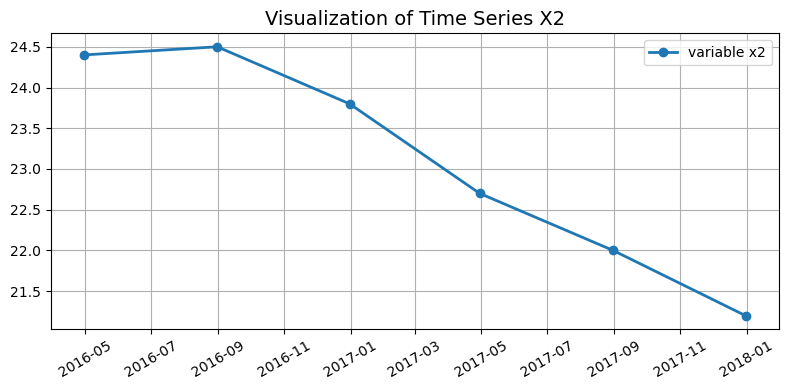

In [9]:
# visualization x2
lineplot(x=df_resample.index, y=df_resample["x2"], label="variable x2", title="Visualization of Time Series X2")

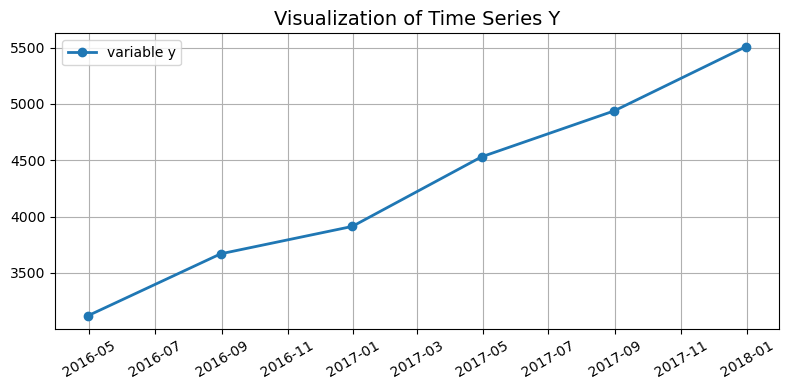

In [10]:
# visualization y
lineplot(x=df_resample.index, y=df_resample["y"], label="variable y", title="Visualization of Time Series Y")

- ScatterPlot

In [11]:
# function scatter plot
def scatter(x, y, label, title):
  
  # create scatter plots
  fig, ax = plt.subplots(figsize = (8,4))
  ax.scatter(x, y, color='tab:blue', label=label, linewidth=2)

  # set labels
  ax.set_title(title, fontsize=14)
  ax.set_xlabel("", fontsize=12)
  ax.set_ylabel("", fontsize=12)
  ax.legend(loc='upper left')
  ax.grid(True)
  
  # return values
  plt.tight_layout()
  plt.show()

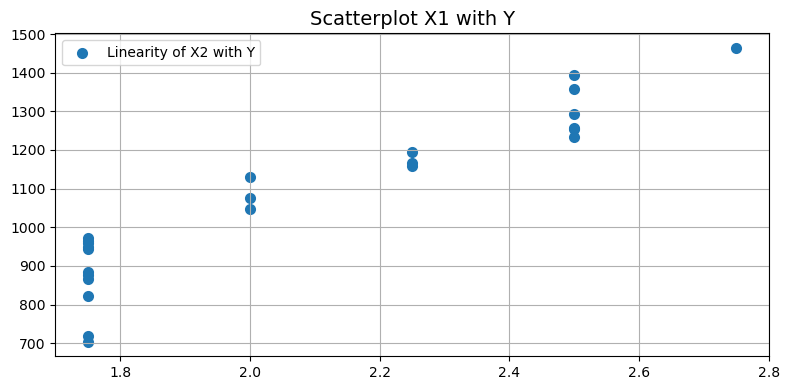

In [12]:
# Scatterplot
scatter(x=dataset["x1"], y=dataset["y"], label="Linearity of X2 with Y", title="Scatterplot X1 with Y")

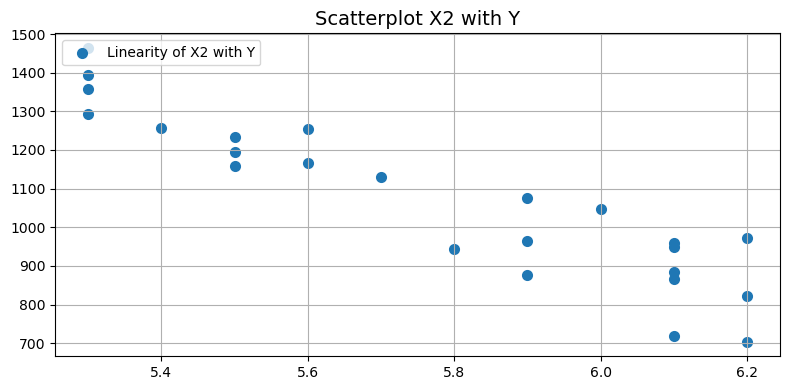

In [13]:
# Scatterplot
scatter(x=dataset["x2"], y=dataset["y"], label="Linearity of X2 with Y", title="Scatterplot X2 with Y")

### Linear Regression via Scikit Learn + OLS

In [14]:
# Bivariate. X1 with Y
model1 = LinearRegression().fit(
  np.array(dataset["x1"]).reshape(-1,1), np.array(dataset["y"]).reshape(-1,1)
)

# predict with x1
yhat1 = model1.predict(np.array(dataset["x1"]).reshape(-1,1))

In [15]:
# Bivariate. X1 with Y
model2 = LinearRegression().fit(np.array(dataset["x2"]).reshape(-1,1), np.array(dataset["y"]).reshape(-1,1))

# predict with x2
yhat2 = model2.predict(np.array(dataset["x2"]).reshape(-1,1))

In [16]:
# function regression
def results_reg(xtrue, ytrue, ypred, label1, label2, title):
  
  # plot results regression
  fig, ax = plt.subplots(figsize = (8,4))
  ax.scatter(xtrue, ytrue, color='tab:blue', label=label1, linewidth=2)
  ax.plot(xtrue, ypred, color="tab:orange", label=label2, linewidth=2)

  # set labels
  ax.set_title(title, fontsize=14)
  ax.set_xlabel("", fontsize=12)
  ax.set_ylabel("", fontsize=12)
  ax.legend(loc='upper left')
  ax.grid(True)
  
  # return values
  plt.tight_layout()
  plt.show()

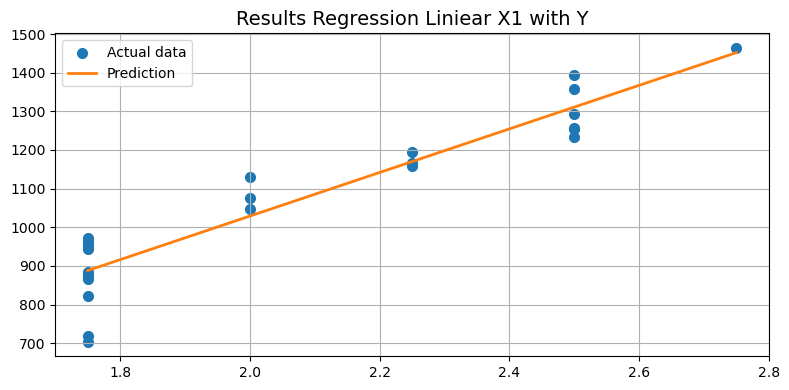

In [17]:
# results regression x1 with y
results_reg(
  xtrue=dataset["x1"], ytrue=dataset["y"], ypred=yhat1,
  label1="Actual data", label2="Prediction",
  title="Results Regression Liniear X1 with Y"
)

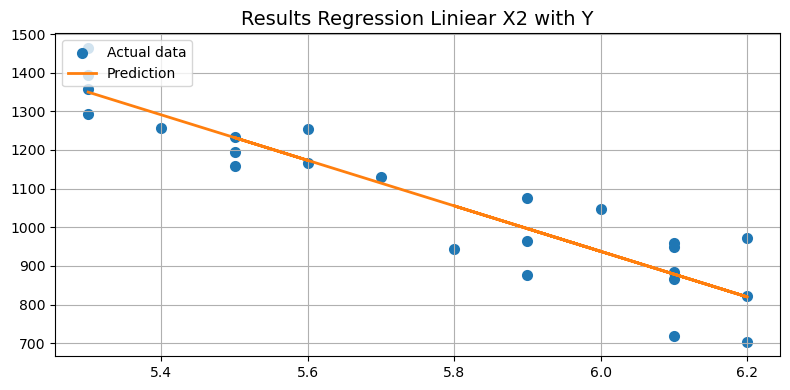

In [18]:
# results regression x2 with y
results_reg(
  xtrue=dataset["x2"], ytrue=dataset["y"], ypred=yhat2,
  label1="Actual data", label2="Prediction",
  title="Results Regression Liniear X2 with Y"
)

### Linear Regression via Statsmodel + OLS

- Bivariate, X1 with Y

In [19]:
# linier regression
model_lin = smf.ols(formula="y ~ x1", data=dataset).fit()
print(model_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     155.0
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           1.95e-11
Time:                        02:55:07   Log-Likelihood:                -136.94
No. Observations:                  24   AIC:                             277.9
Df Residuals:                      22   BIC:                             280.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -99.4643     95.210     -1.045      0.3

- Bivariate, X2 with Y

In [20]:
# linier regression
model_lin = smf.ols(formula="y ~ x2", data=dataset).fit()
print(model_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     125.4
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           1.49e-10
Time:                        02:55:07   Log-Likelihood:                -139.14
No. Observations:                  24   AIC:                             282.3
Df Residuals:                      22   BIC:                             284.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4471.3393    304.254     14.696      0.0

- Multivariate, Y = X1 + X2

In [21]:
# linier regression
model_lin = smf.ols(formula="y ~ x1 + x2", data=dataset).fit()
print(model_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           4.04e-11
Time:                        02:55:07   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1798.4040    899.248      2.000      0.0